<a href="https://colab.research.google.com/github/Bhoomikadayal/Cohort-Chario-EDA-Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Bookings Analysis

# **Project Summary -**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

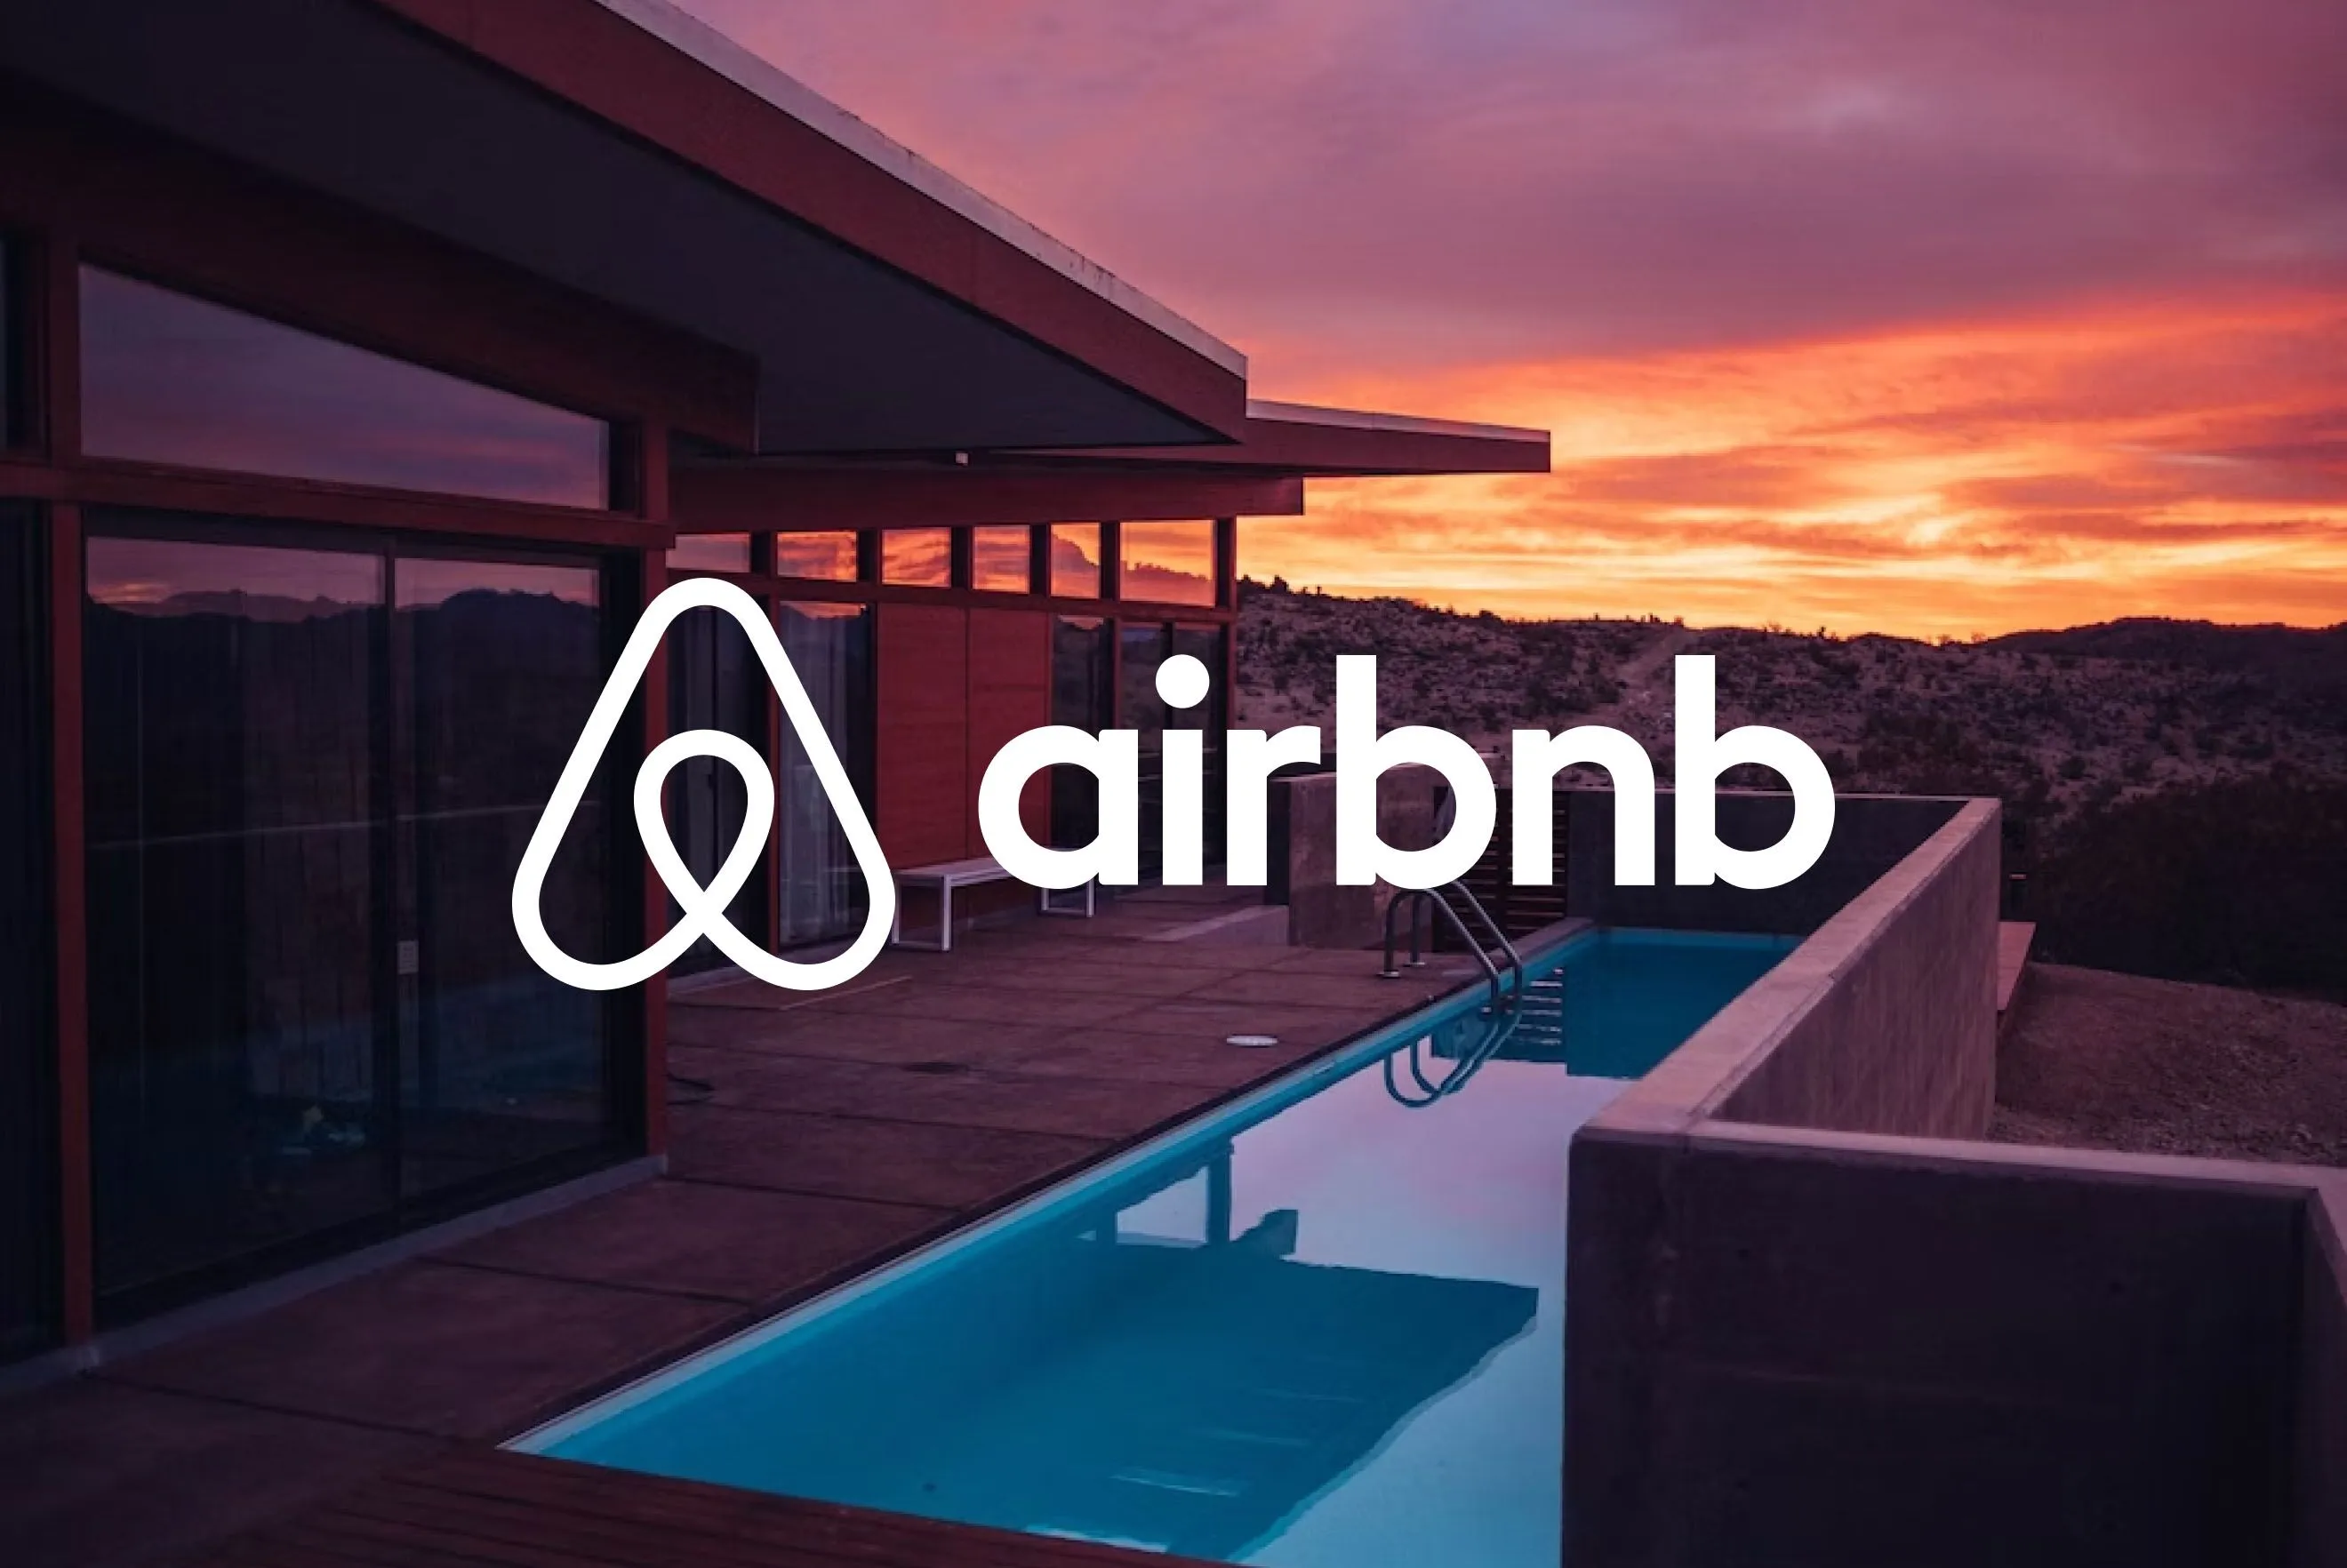

## <b> Data Description </b>


**So we can see our dataset has 48895 data and 16 columns. Lets try to understand about the columns we've got here.**

id : a unique id identifying an airbnb lisitng
name : name representing the accommodation

host_id : a unique id identifying an airbnb host

host_name : name under whom host is registered

neighbourhood_group : a group of area

neighbourhood : area falls under neighbourhood_group

latitude : coordinate of listing

longitude : coordinate of listing

room_type : type to categorize listing rooms

price : price of listing

minimum_nights : the minimum nights required to stay in a single visit

number_of_reviews : total count of reviews given by visitors

last_review : date of last review given


reviews_per_month : rate of reviews given per month

calculated_host_listings_count : total no of listing registered under the host

availability_365 : the number of days for which a host is available in a year.

# ***Let's Begin !***

## ***1. Know Your Data***
### Dataset Loading from google drive and Import Libraries

In [1]:
# since the dataset is hosted on my google drive, it is shared with anyone
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_location='/gdrive/MyDrive/casptone project - 1 (EDA)/Airbnb NYC 2019.csv'
df=pd.read_csv(file_location) # it reads the airbnb nyc data of csv file

### Dataset First View

In [3]:
df.shape # Total number of rows and columns in dataset

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **UNDERSTAND & CLEAN  THE DATA** :-  


1.   getting total columns in data
2.   checking the total null values in data
3. check the uniqueness from meaningfull columns    (neigbourhood_group, neighbourhood , room_type )
4. checking the numerical value columns





In [6]:
df.columns # checking columns (variable) in data

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.isna().sum() # checking null values in data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.drop(['reviews_per_month','last_review'],axis=1,inplace=True) #Drop unecesseary columns which is high number of null vaalues so it is not much important

In [9]:
df.columns # again check the remaining columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df.shape

(48895, 14)

In [11]:
df.dropna(subset=['name','host_name'],axis=0,inplace=True) # drop null values from selected columns

In [12]:
df.isna().sum() # again check total number of null values is all data

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
 #Getting the basic statistics analysis of the overall data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [14]:
df['neighbourhood_group'].unique() #it tells the total unique name

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
# it tells the unique value in neighbourhood column
len(df['neighbourhood'].unique())

221

In [16]:
# Examining the unique value in room type column
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***




## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


#### Chart - 1

***What is the average preferred price by customers according to the location?***

In [20]:
# Unstack the group by information for plot the graph
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

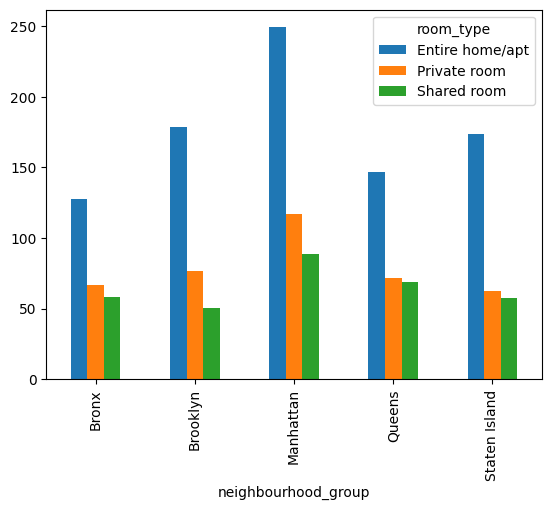

In [21]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

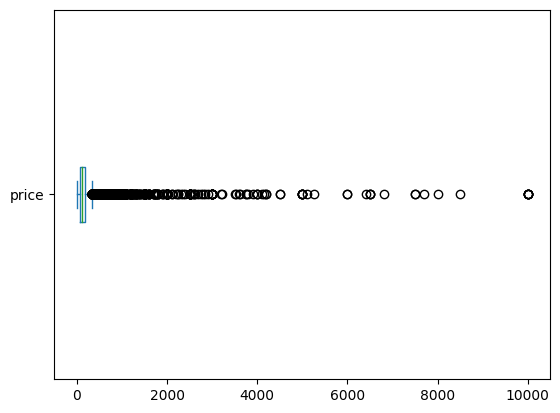

In [22]:
# checking for outlier in price
df.price.plot(kind='box',vert=False)
plt.show()

Conclusion:
The box plot above helps to visualize the price distribution.


1.   We have lower quantile at price$0.

2.   We have upper quantile at price$10,000.




In [23]:
# Defining the price range
q_low = df["price"].quantile(0.01)
q_hi  = df["price"].quantile(0.995)
q_low,q_hi

(30.0, 1000.0)

Conclusion:
1.   The price on rooms are start from 0 to 10000 dollar
2.   The average room price is 152.74 dollar as per the mean given in describe table


>



***No. of active host per location (Where most of the host focused to own property)***

In [24]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


#### Chart - 2

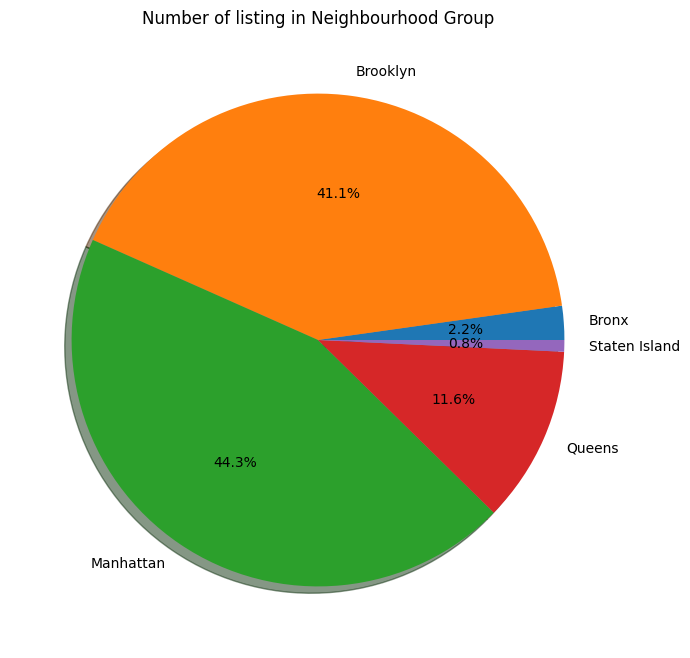

In [25]:
# Number of listing in neighbourhood group
ng_Listing = pd.DataFrame(df.groupby('neighbourhood_group')['id'].count())

#Pie chart to see different neighbourhood_group by listing
ax = ng_Listing.plot.pie(y='id',autopct='%1.1f%%', legend = False, title='Number of listing in Neighbourhood Group',shadow=True, figsize=(18,8))
ax.set_ylabel("");

In [26]:
##Most of the people stay in Manhattan and Brooklyn.##

#### Chart - 3

In [27]:
sns.scatterplot?


<Axes: xlabel='longitude', ylabel='latitude'>

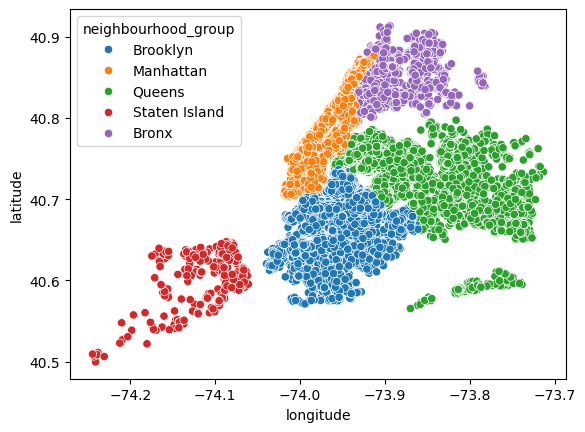

In [28]:
sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group')

#### Chart - 4

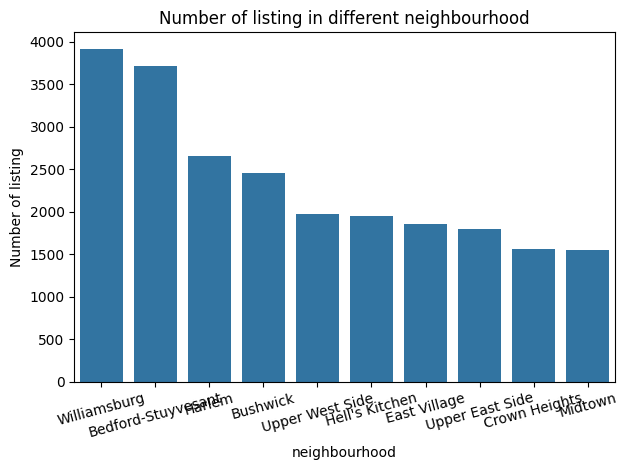

In [29]:
# Number of AirBnb in different neighbourhood
n_Listing = df.groupby(['neighbourhood',])['id'].count().reset_index().sort_values('id',ascending=False,ignore_index=True).head(10)

# Barplot of different neighbourhood

ax = sns.barplot(x="neighbourhood", y="id", data=n_Listing)
plt.title('Number of listing in different neighbourhood')
ax.set(xlabel="neighbourhood", ylabel = "Number of listing")
plt.xticks(rotation=15)
plt.tight_layout()

#### Chart - 5

[Text(0, 0.5, 'Number of listing')]

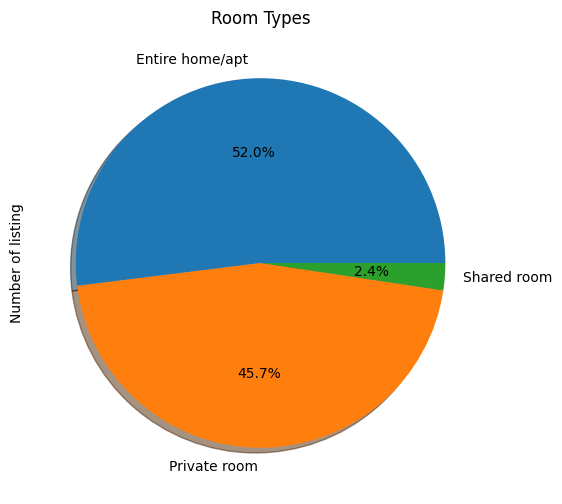

In [30]:
# Listing of different room_type
rt_Listing = pd.DataFrame(df.groupby('room_type')['id'].count())

# Pie chart to see different room_type by count
ax = rt_Listing.plot.pie(y='id', autopct='%1.1f%%', legend = False, figsize=(18,6),shadow=True)
plt.title('Room Types')
ax.set(ylabel = "Number of listing")

#### Chart - 6

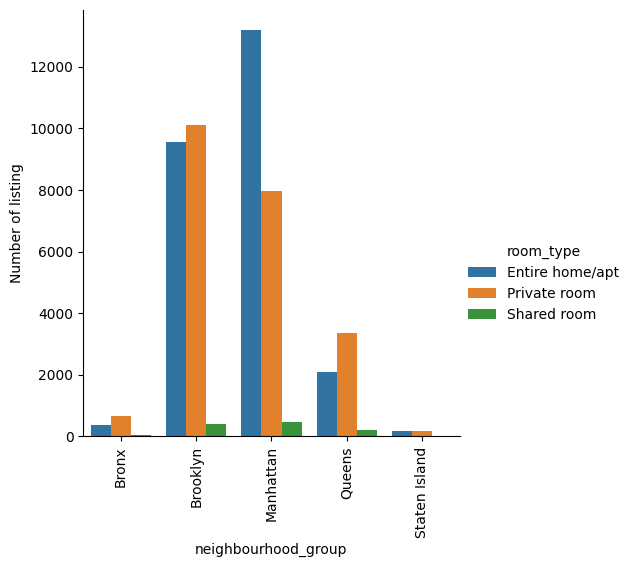

In [31]:
# Number of different room type in  neighbourhood group
ng_roomtype = df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index().head(15)

# Different neighbourhood group and room type
ax = sns.catplot(
    data=ng_roomtype, kind="bar",
    x="neighbourhood_group", y="id", hue="room_type"
)
ax.set(ylabel = "Number of listing")
plt.xticks(rotation=90);
plt.ioff()

In [32]:
# Combining neighbourhood group with room_type by price
ng_rt_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

# Different neighbourhood group, room type and average price
ax = ng_rt_price.plot(kind = "bar")
ax.set_ylabel('Price')

plt.title('Average price of a room according to the neighbourhood group');

In [33]:
#Average price of AirBnb in different neighbourhood
# Average price of top 10 most expensive neighbourhood
n_avgprice1 = pd.DataFrame(df.groupby('neighbourhood')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True).head(10))
# Average price of top 10 most cheapest neighbourhood
n_avgprice2 = pd.DataFrame(df.groupby('neighbourhood')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True).tail(10))
# combine the both
n_avgprice =pd.concat([n_avgprice1,n_avgprice2])
# Barplotto see different neighbourhood by price
sns.barplot(x='price', y='neighbourhood', data=n_avgprice)
plt.title('Average Price of Airbnb in different neighbourhood')

Text(0.5, 1.0, 'Average Price of Airbnb in different neighbourhood')

In [34]:
# Average reviews of Airbnb in different neighbourhood
n_numRev = df.groupby(['neighbourhood'])['number_of_reviews'].mean().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True).head(15)

# Barplot to see different neighbourhood by reviews
sns.barplot(x='neighbourhood',y='number_of_reviews',data=n_numRev)
plt.xticks(rotation=90);

**Correlation Matrix of Attributes**

<ipython-input-37-9a0050326435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


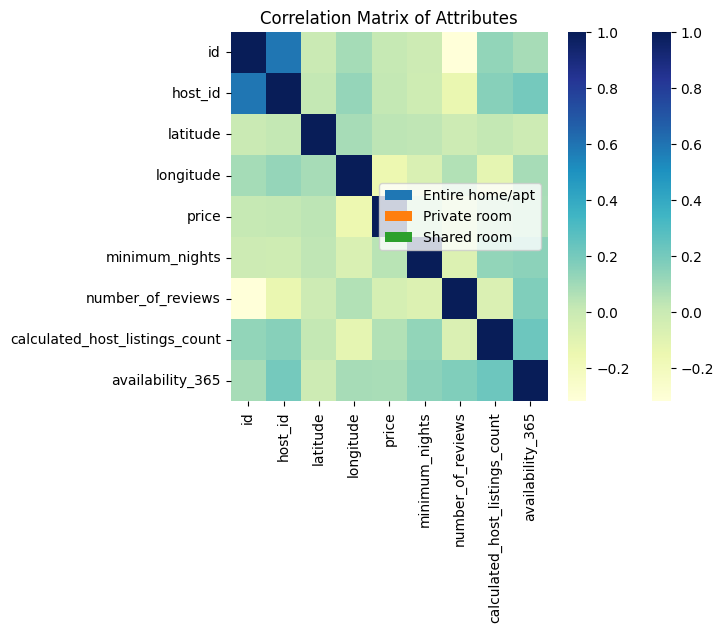

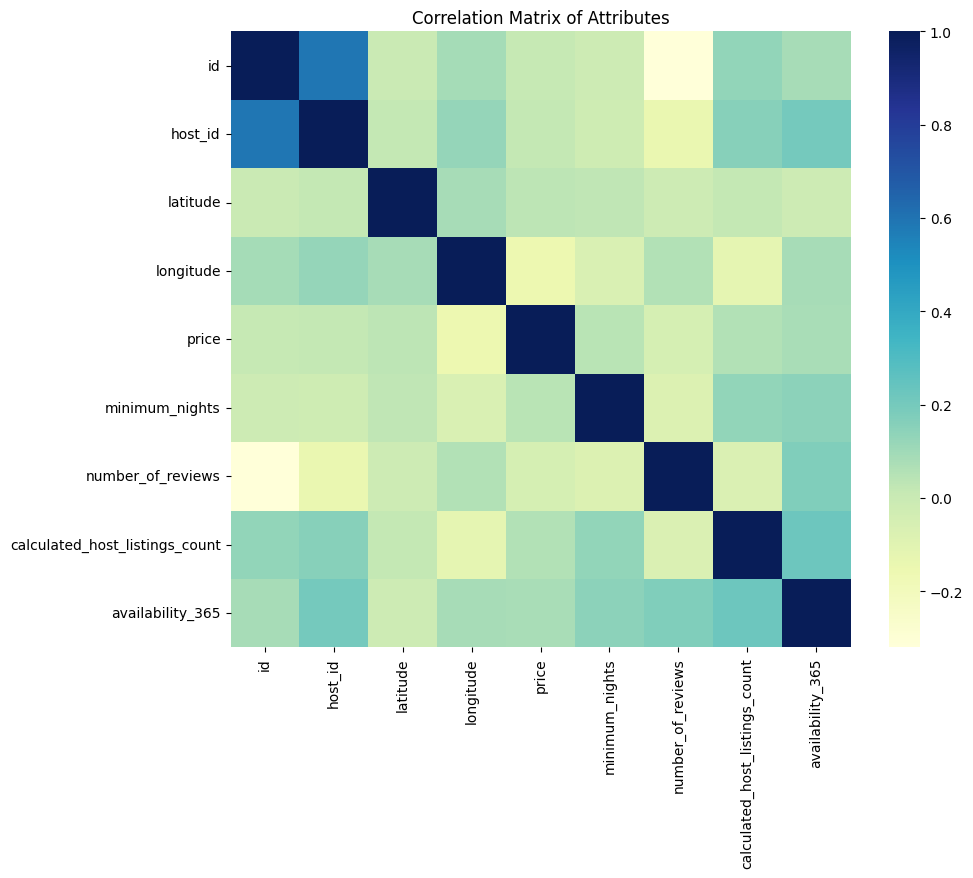

In [37]:
# Correlation Matrix of Attributes
corr_df = df.corr()

# Heatmap to see correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_df, cmap="YlGnBu")
ax.set_title('Correlation Matrix of Attributes')
plt.show()

# **Conclusion:-**

*From the entire analysis, it can be concluded that*

⮚	Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.

⮚ We can conclude that throughout NewYork city there is a larger preference towards Entire apt as compared to private or shared rooms irrespective to the prices.

⮚	Most of the people perfer to stay in Manhattan and Brooklyn where as least like place is staten island and Bronx.

⮚	Though location of property has high relation on deciding its price, but a property in popular location doesn’t mean it will stay occupied in most of the time.

⮚	Performing a regression on this dataset may result in high error rate, as the features given in this dataset, are of very poor quality in deciding the property valuation. We can see this by looking at correlation heatmap. We would need more features like bedrooms, bathroom, property age (guessed it’d be a very important one), tax rate applicable on land, room extra amenities, distance to nearest hospital, stores or schools. These features might have a high relation with price.

